In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

In [7]:
img_size = (128, 128)
batch_size = 32

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = train_datagen.flow_from_directory(
    "data/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    "data/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [9]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=img_size + (3,))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(train_data, validation_data=val_data, epochs=5)

c:\Users\s-a49\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 310ms/step - accuracy: 0.7749 - loss: 0.6092 - val_accuracy: 0.9200 - val_loss: 0.2472
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 293ms/step - accuracy: 0.9190 - loss: 0.2219 - val_accuracy: 0.9200 - val_loss: 0.2269
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 305ms/step - accuracy: 0.9406 - loss: 0.1740 - val_accuracy: 0.9133 - val_loss: 0.2284
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 291ms/step - accuracy: 0.9476 - loss: 0.1373 - val_accuracy: 0.9167 - val_loss: 0.2691
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 294ms/step - accuracy: 0.9434 - loss: 0.1362 - val_accuracy: 0.9383 - val_loss: 0.2001


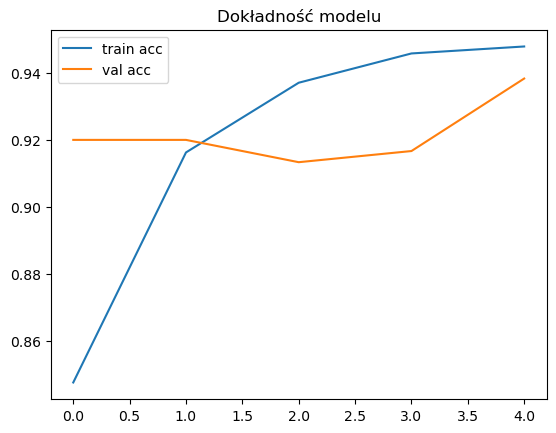

In [11]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Dokładność modelu")
plt.show()

In [12]:
model.save('food_classifier.keras')
model.save('food_classifier.h5')

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step


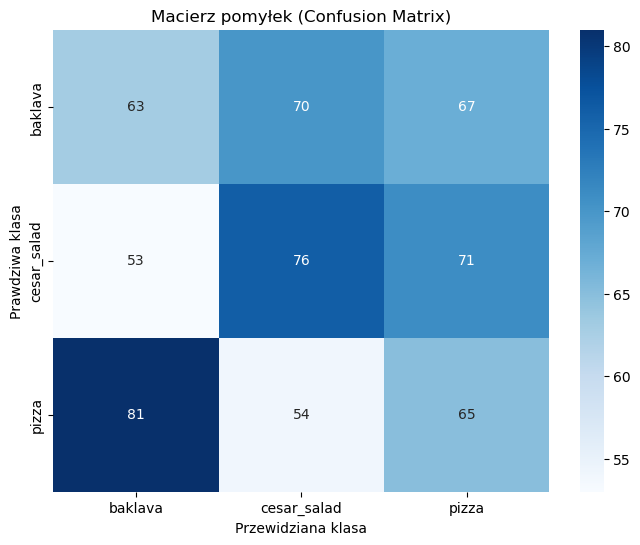


Raport klasyfikacji:
              precision    recall  f1-score   support

     baklava       0.32      0.32      0.32       200
 cesar_salad       0.38      0.38      0.38       200
       pizza       0.32      0.33      0.32       200

    accuracy                           0.34       600
   macro avg       0.34      0.34      0.34       600
weighted avg       0.34      0.34      0.34       600



In [14]:
y_true = val_data.classes
y_pred = np.argmax(model.predict(val_data), axis=1)
class_labels = list(val_data.class_indices.keys())

# Macierz pomyłek
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Przewidziana klasa")
plt.ylabel("Prawdziwa klasa")
plt.title("Macierz pomyłek (Confusion Matrix)")
plt.show()

# Raport klasyfikacji
print("\nRaport klasyfikacji:")
print(classification_report(y_true, y_pred, target_names=class_labels))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
Model przewiduje: baklava


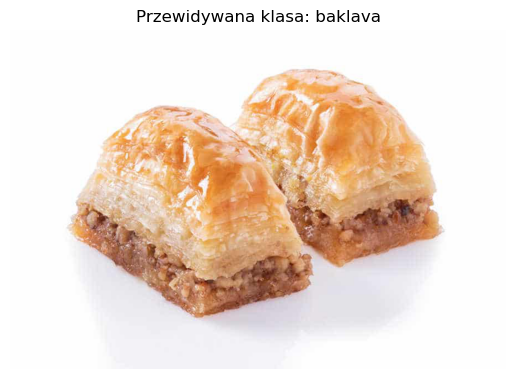

In [29]:
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model("food_classifier.keras")

img_path = "data/test/baklava/baklava.jpg"  # zmień na ścieżkę do Twojego zdjęcia
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
class_indices = train_data.class_indices

inv_map = {v: k for k, v in class_indices.items()}
pred_label = inv_map[np.argmax(pred)]

print("Model przewiduje:", pred_label)
plt.imshow(image.load_img(img_path))
plt.title(f"Przewidywana klasa: {pred_label}")
plt.axis('off')
plt.show()